In [1]:
import numpy as np
import torch
import torchvision
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('~/Downloads/mnist', download=True, train=True, transform=transform)
valset = datasets.MNIST('~/Downloads/mnis', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False)

# Defining a Deep Neural Network

In [7]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


![image](https://camo.githubusercontent.com/967fce297e554d52005bc7bb9a9fe64a6576fcf6/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f646d6c632f7765622d646174612f6d61737465722f6d786e65742f696d6167652f6d6c705f6d6e6973742e706e67)

## plot a sample from the data set

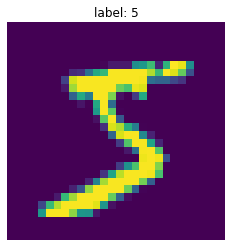

In [8]:
image_number = 0
f, ax = plt.subplots()
ax.imshow(trainset[image_number][0][0].numpy())
ax.set_title(f"label: {trainset[image_number][1]}")
ax.set_axis_off()
plt.show()

In [13]:
trainset[image_number][0][0].numpy().shape

(28, 28)

In [16]:
trainset[image_number][0][0].numpy().flatten().shape

(784,)

## see the prediction of the number with random weights

<BarContainer object of 10 artists>

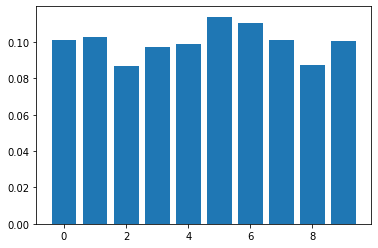

In [9]:
plt.bar(range(10), (model(trainset[image_number][0].reshape((1, 784)))).detach().numpy()[0])

## train the network

In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

n_epochs = 15
for epoch_number in range(n_epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        output = model(images)
        loss = loss_function(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(epoch_number, running_loss/len(trainloader)))

Epoch 0 - Training loss: 2.294168310124737
Epoch 1 - Training loss: 2.138466130568783
Epoch 2 - Training loss: 1.8072935363122904
Epoch 3 - Training loss: 1.678190481688168
Epoch 4 - Training loss: 1.6388431291844545
Epoch 5 - Training loss: 1.5966069825422535
Epoch 6 - Training loss: 1.5797661526370912
Epoch 7 - Training loss: 1.5698155666719367
Epoch 8 - Training loss: 1.5630660867894381
Epoch 9 - Training loss: 1.5576168667278818
Epoch 10 - Training loss: 1.5532768804635575
Epoch 11 - Training loss: 1.5495248308568113
Epoch 12 - Training loss: 1.5463960788397393
Epoch 13 - Training loss: 1.5433100723762756
Epoch 14 - Training loss: 1.5406130200255908


## check again the prediction with the trained weights

<BarContainer object of 10 artists>

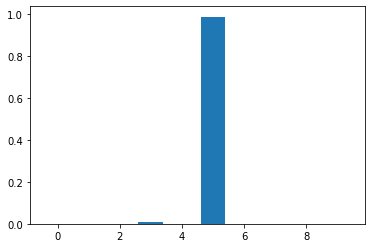

In [11]:
plt.bar(range(10), (model(trainset[image_number][0].reshape((1, 784)))).detach().numpy()[0])